<a href="https://colab.research.google.com/github/ola-sumbo/Assignment-3-and-4-/blob/master/0pointtwoeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries 

In [2]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Read data 

In [5]:
from google.colab import files
uploaded = files.upload()

Saving SampleSubmission.csv to SampleSubmission.csv


In [6]:
train = pd.read_csv('/content/Train (1).csv')
test = pd.read_csv('/content/Test (1).csv')
ss = pd.read_csv('/content/SampleSubmission.csv')

# Simple EDA

In [8]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [9]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve


In [10]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [11]:
print('Train shape:',train.shape,'\nTest shape:', test.shape, '\nsamplesubmission shape:',ss.shape)

Train shape: (12079, 14) 
Test shape: (5177, 13) 
samplesubmission shape: (5177, 2)


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      5177 non-null   object
 1   Policy Start Date       5177 non-null   object
 2   Policy End Date         5177 non-null   object
 3   Gender                  5021 non-null   object
 4   Age                     5177 non-null   int64 
 5   First Transaction Date  5177 non-null   object
 6   No_Pol                  5177 non-null   int64 
 7   Car_Category            3539 non-null   object
 8   Subject_Car_Colour      2172 non-null   object
 9   Subject_Car_Make        4116 non-null   object
 10  LGA_Name                2395 non-null   object
 11  State                   2389 non-null   object
 12  ProductName             5177 non-null   object
dtypes: int64(2), object(11)
memory usage: 525.9+ KB


# Since the ratio of categorical variables to numerical variable is high, consider combining both train and test for easy preproccessing 

In [14]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (17256, 14)


In [15]:
all_data.tail()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
17251,ZYXX5AF,2010-07-18,2011-07-17,Male,48,2010-07-18,1,Saloon,NaN,Honda,NaN,NaN,CarSafe,NaN
17252,ZYYOZ5L,2010-12-04,2011-12-03,NaN,50,2010-12-04,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic,NaN
17253,ZZ1GTKD,2010-09-24,2011-09-23,Male,1,2010-09-24,1,NaN,NaN,NaN,NaN,NaN,CarSafe,NaN
17254,ZZDXQSI,2010-07-17,2011-07-16,Female,52,2010-07-17,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic,NaN
17255,ZZYTLV1,2010-07-17,2011-07-16,Male,68,2010-07-17,1,Saloon,NaN,Peugeot,NaN,NaN,CarSafe,NaN


In [16]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age']
cat_col = [col for col in test.columns if col not in date_col+num_col]
cat_col

['ID',
 'Gender',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [17]:
cat_col.remove('ID')

In [18]:
train.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [19]:
test.describe()

,Age,No_Pol
count,5177.000000,5177.000000
mean,43.710257,1.308287
std,22.439018,0.712004
min,-76.000000,1.000000
25%,34.000000,1.000000
50%,40.000000,1.000000
75%,50.000000,1.000000
max,320.000000,10.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


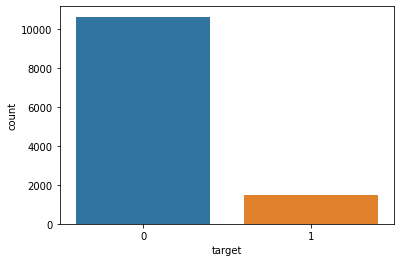

In [20]:
sns.countplot(train.target)

The dataset is is skewed towards class 0, consider balancing the dataset 

In [21]:
print("Are There Missing value in train? :",train.isnull().any().any())
print((train.isnull().sum()/train.shape[0])*100)

Are There Missing value in train? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     2.972100
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              30.946270
Subject_Car_Colour        57.637222
Subject_Car_Make          20.498386
LGA_Name                  53.613710
State                     53.713056
ProductName                0.000000
target                     0.000000
dtype: float64


In [22]:
print("Are There Missing value in test? :",test.isnull().any().any())
print((test.isnull().sum()/test.shape[0])*100)

Are There Missing value in test? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     3.013328
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              31.639946
Subject_Car_Colour        58.045200
Subject_Car_Make          20.494495
LGA_Name                  53.737686
State                     53.853583
ProductName                0.000000
dtype: float64


Remember to handle the missing values 

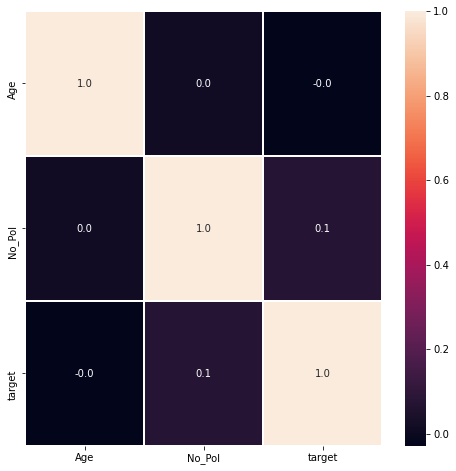

In [ ]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(train.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

### Correlation might not be a best measure for this dataset since there are more categorical features

In [23]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0


In [24]:
def check_categorical_relationship(cat_col,y_col,df):
    for feat in cat_col:
        plt.figure(figsize=(20,5))
        sns.barplot(df[feat],df[y_col])
        plt.show()
        print("\n \n \n ")

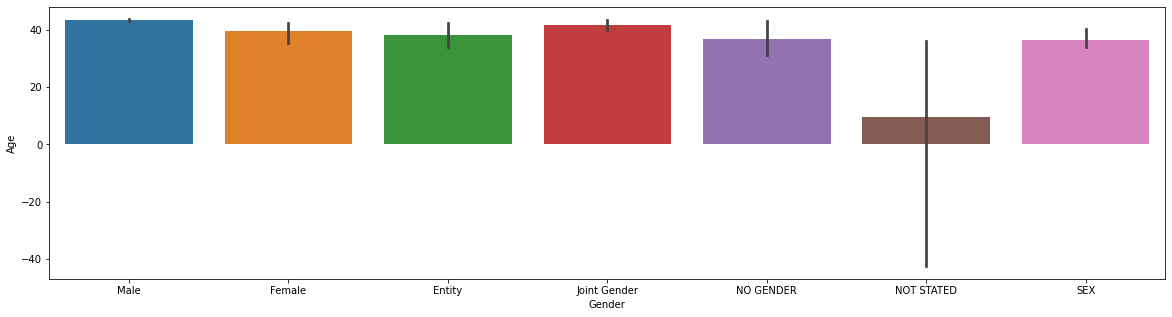

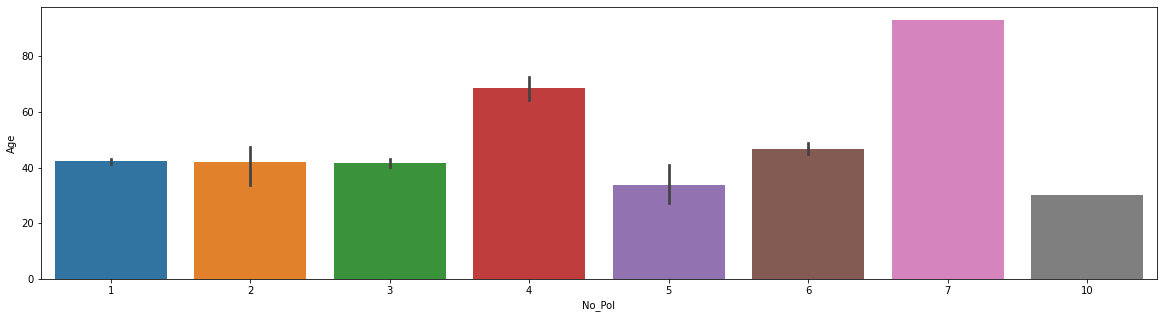

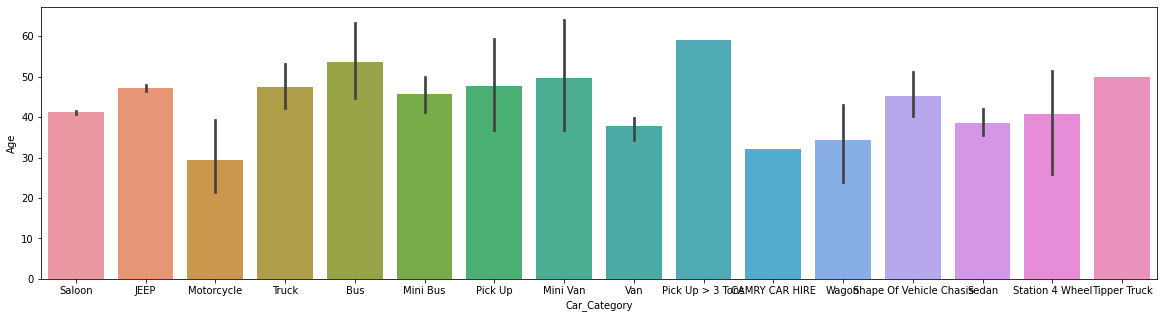

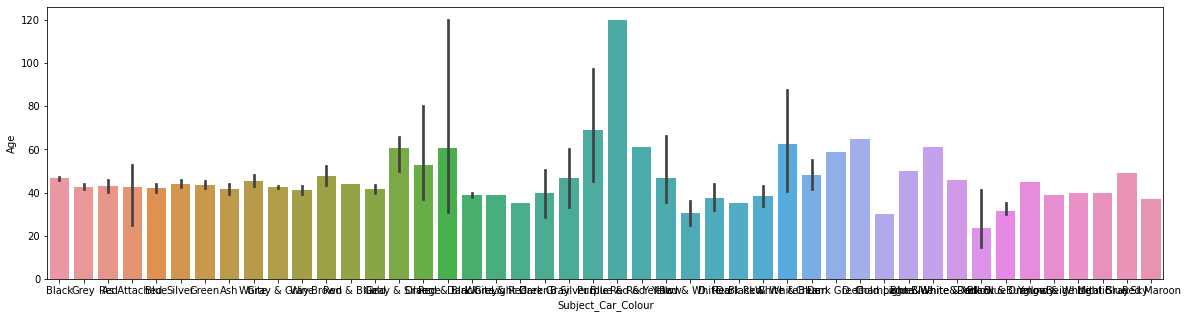

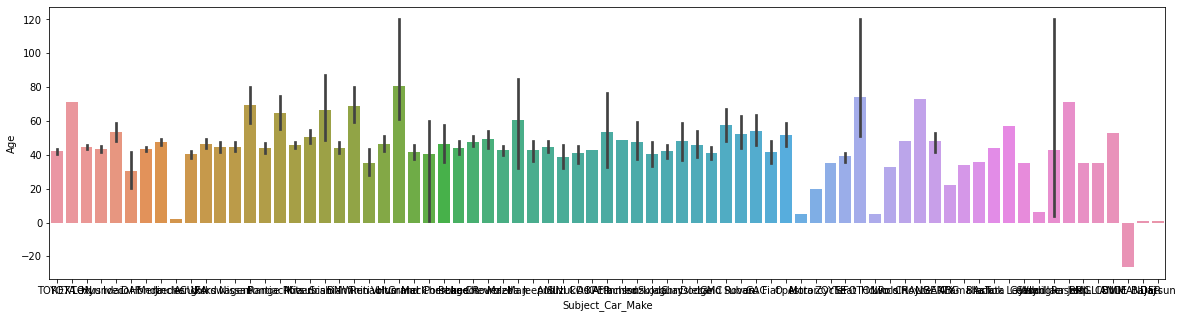

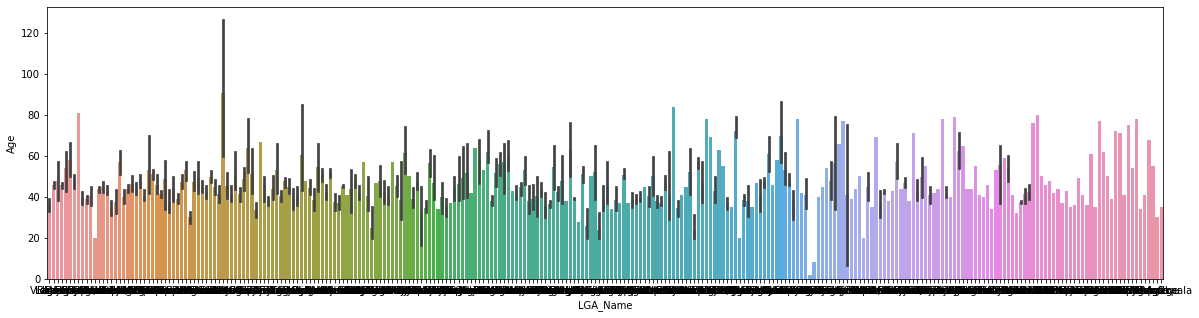

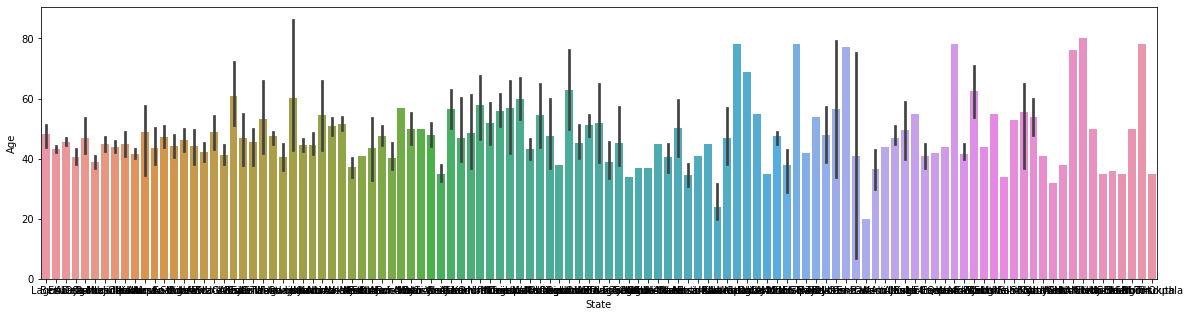

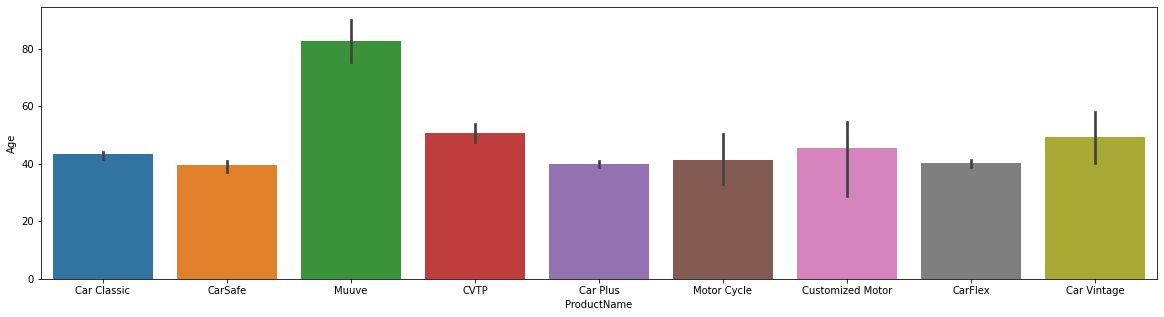

In [ ]:
check_categorical_relationship(cat_col,'Age',all_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


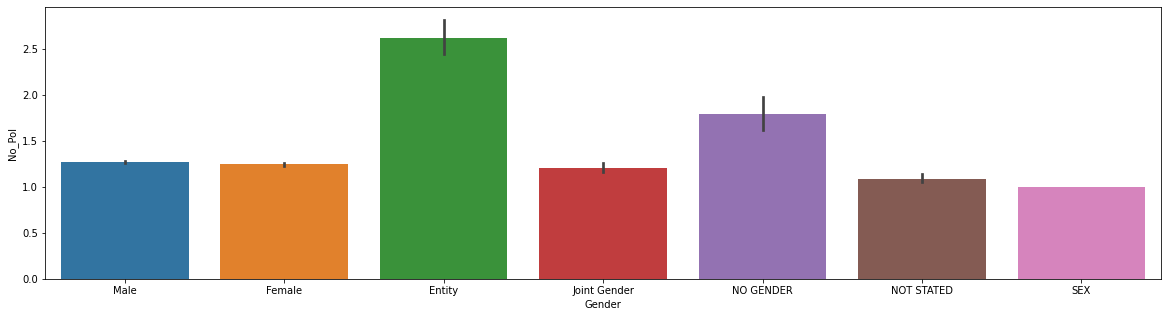

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


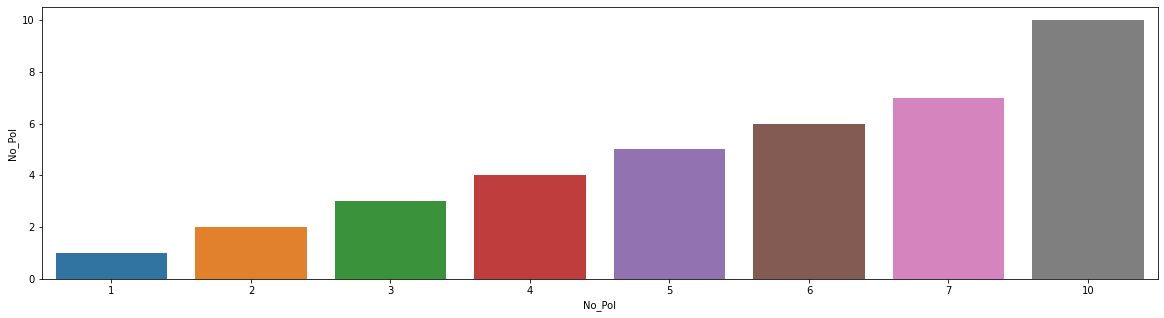

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


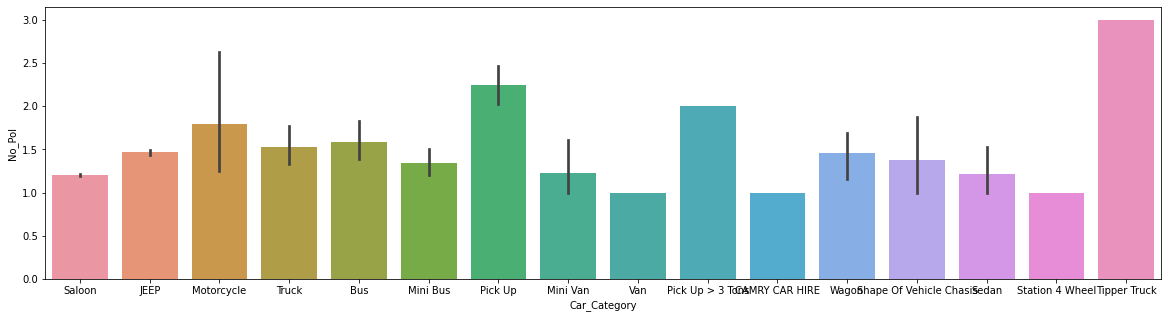

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


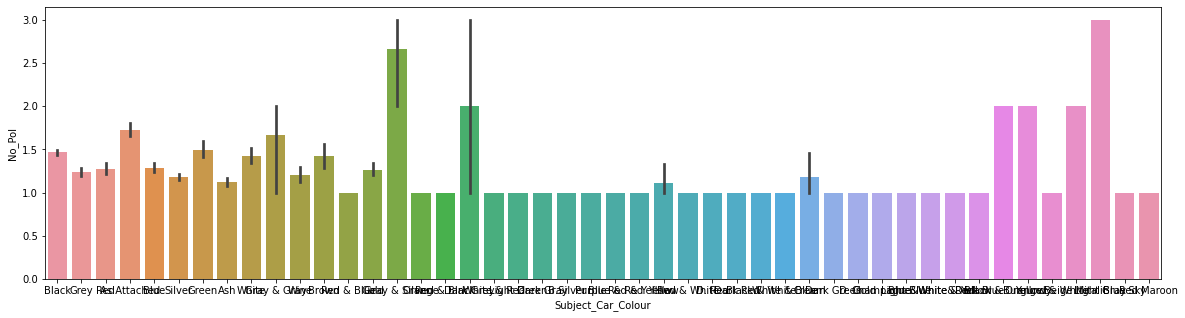

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


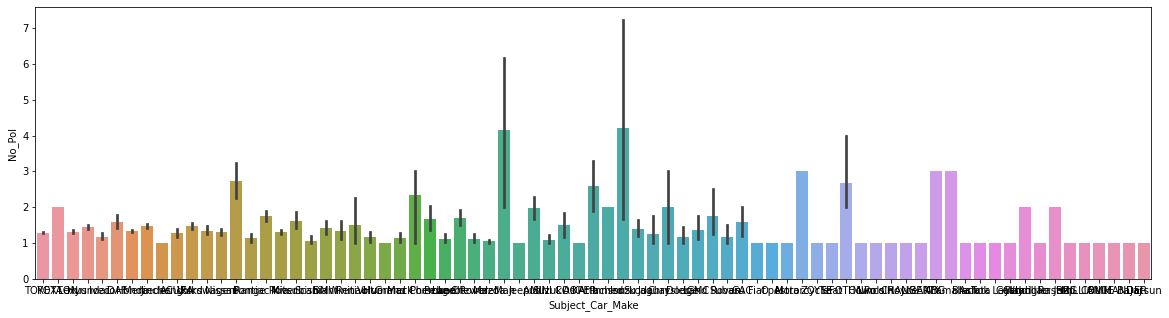

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


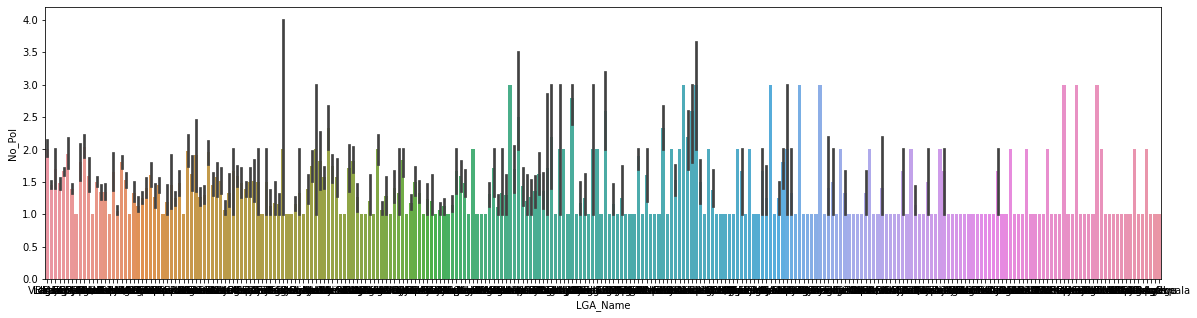

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


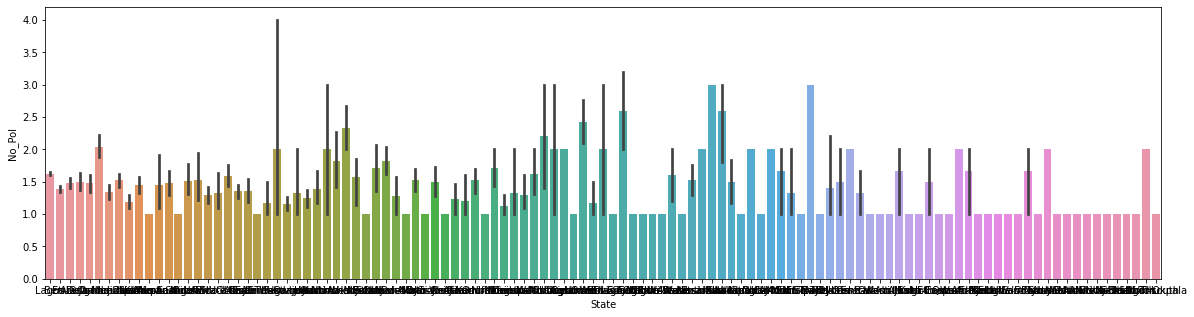

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


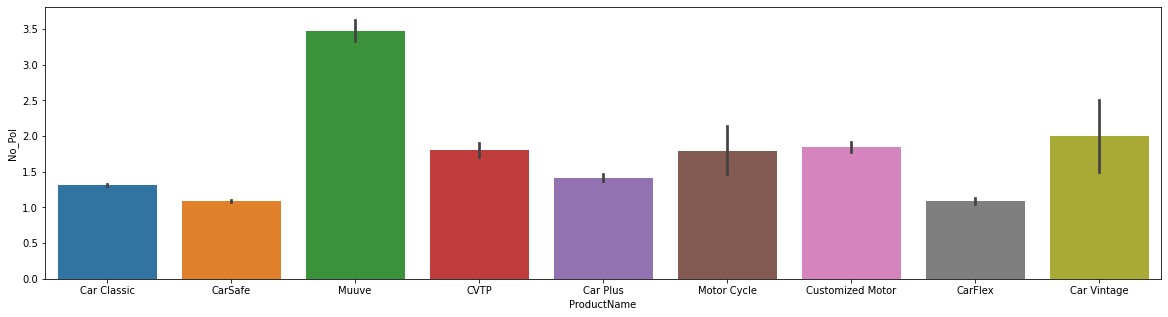

In [25]:
check_categorical_relationship(cat_col,'No_Pol',all_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


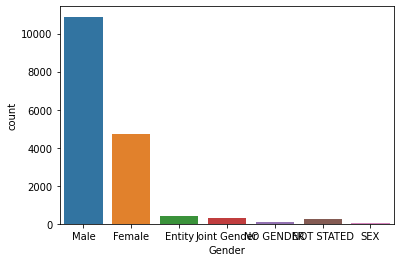

In [26]:
# Gender distribution 
sns.countplot(all_data.Gender)

In [27]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', nan, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

# Basic Data preprocessing 

In [28]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


### fill mising value

In [29]:
all_data = all_data.fillna(9999)
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,9999,9999,9999,9999,9999,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,9999,9999,9999,Lagos,Lagos,Muuve,1.0


In [31]:
print("Are There still Missing value in data? :",all_data.isnull().any().any())
print((all_data.isnull().sum()/all_data.shape[0])*100)

Are There still Missing value in data? : False
ID                        0.0
Policy Start Date         0.0
Policy End Date           0.0
Gender                    0.0
Age                       0.0
First Transaction Date    0.0
No_Pol                    0.0
Car_Category              0.0
Subject_Car_Colour        0.0
Subject_Car_Make          0.0
LGA_Name                  0.0
State                     0.0
ProductName               0.0
target                    0.0
dtype: float64


### date features

In [32]:
date_col

['Policy Start Date', 'Policy End Date', 'First Transaction Date']

In [33]:
for feat in date_col:
    all_data[feat] = pd.to_datetime(all_data[feat])

In [34]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      17256 non-null  object        
 1   Policy Start Date       17256 non-null  datetime64[ns]
 2   Policy End Date         17256 non-null  datetime64[ns]
 3   Gender                  17256 non-null  object        
 4   Age                     17256 non-null  int64         
 5   First Transaction Date  17256 non-null  datetime64[ns]
 6   No_Pol                  17256 non-null  int64         
 7   Car_Category            17256 non-null  object        
 8   Subject_Car_Colour      17256 non-null  object        
 9   Subject_Car_Make        17256 non-null  object        
 10  LGA_Name                17256 non-null  object        
 11  State                   17256 non-null  object        
 12  ProductName             17256 non-null  object

In [ ]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,9999,9999,9999,9999,9999,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,9999,9999,9999,Lagos,Lagos,Muuve,1.0


In [35]:
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.quarter
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)

In [36]:
extract_date_info(all_data,date_col)

In [37]:
all_data.head()

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Start Date_year,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_year,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_year,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter
0,0040R73,Male,30,1,Saloon,Black,TOYOTA,9999,9999,Car Classic,0.0,2,14,5,2,2,13,5,2,2,14,5,2
1,0046BNK,Female,79,1,JEEP,Grey,TOYOTA,9999,9999,Car Classic,1.0,4,29,11,4,4,28,11,4,4,29,11,4
2,005QMC3,Male,43,1,Saloon,Red,TOYOTA,9999,9999,Car Classic,0.0,1,21,3,1,1,20,3,1,1,21,3,1
3,0079OHW,Male,2,1,9999,9999,9999,9999,9999,CarSafe,0.0,3,21,8,3,3,20,8,3,3,21,8,3
4,00BRP63,Entity,20,3,9999,9999,9999,Lagos,Lagos,Muuve,1.0,3,29,8,3,4,31,12,4,3,29,8,3


In [38]:
all_data.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 9999, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [39]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O',9999:'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }

In [40]:
all_data.Gender = all_data.Gender.map(mapper)

In [41]:
all_data.Gender.unique()

array(['M', 'F', 'O'], dtype=object)

In [ ]:
# pd.get_dummies(all_data)

# Creat Base model 

In [42]:
all_data.target = all_data.target.astype(int)

In [43]:
all_data.drop(columns=['ID'],inplace=True)

In [44]:
#Get the new dataset
train_n = all_data[:ntrain]
test_n = all_data[ntrain:]

In [45]:
test_n.drop("target",axis = 1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
X= train_n.drop(columns=['target'])
y= train_n.target

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42,)

In [48]:
test_n.columns

Index(['Gender', 'Age', 'No_Pol', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName',
       'Policy Start Date_year', 'Policy Start Date_day',
       'Policy Start Date_month', 'Policy Start Date_quarter',
       'Policy End Date_year', 'Policy End Date_day', 'Policy End Date_month',
       'Policy End Date_quarter', 'First Transaction Date_year',
       'First Transaction Date_day', 'First Transaction Date_month',
       'First Transaction Date_quarter'],
      dtype='object')

In [51]:
categorical_feat = ['Gender', 'Age', 'No_Pol', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']

In [52]:
categorical_feat

['Gender',
 'Age',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [54]:
!pip install catboost
from catboost import CatBoostClassifier
import catboost
model = CatBoostClassifier(cat_features=categorical_feat,verbose=50)

     |████████████████████████████████| 66.3MB 61kB/s 


In [55]:
model.fit(X_train,y_train)

Learning rate set to 0.025158
0:	learn: 0.6672531	total: 77.8ms	remaining: 1m 17s
50:	learn: 0.3333817	total: 933ms	remaining: 17.4s
100:	learn: 0.2964793	total: 1.84s	remaining: 16.4s
150:	learn: 0.2838312	total: 2.87s	remaining: 16.1s
200:	learn: 0.2773295	total: 3.9s	remaining: 15.5s
250:	learn: 0.2721512	total: 4.97s	remaining: 14.8s
300:	learn: 0.2671586	total: 6.02s	remaining: 14s
350:	learn: 0.2629035	total: 7.08s	remaining: 13.1s
400:	learn: 0.2590596	total: 8.19s	remaining: 12.2s
450:	learn: 0.2553651	total: 9.24s	remaining: 11.2s
500:	learn: 0.2515452	total: 10.3s	remaining: 10.3s
550:	learn: 0.2482252	total: 11.4s	remaining: 9.26s
600:	learn: 0.2451244	total: 12.4s	remaining: 8.25s
650:	learn: 0.2422278	total: 13.5s	remaining: 7.24s
700:	learn: 0.2391465	total: 14.6s	remaining: 6.22s
750:	learn: 0.2357152	total: 15.7s	remaining: 5.2s
800:	learn: 0.2325917	total: 16.8s	remaining: 4.17s
850:	learn: 0.2295895	total: 17.9s	remaining: 3.13s
900:	learn: 0.2263294	total: 19s	remain

In [64]:
y_pred = model.predict(X_train)

In [65]:
from sklearn.metrics import classification_report

In [66]:
target_names = ['class 0', 'class 1']
print('*************** Classification report on training set ********************')
print(classification_report(y_train, y_pred, target_names=target_names))

*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0       0.90      0.99      0.94      7110
     class 1       0.73      0.17      0.27       982

    accuracy                           0.89      8092
   macro avg       0.81      0.58      0.61      8092
weighted avg       0.88      0.89      0.86      8092



In [67]:
print('*************** Classification report on testing set ********************')
print(classification_report(y_test, model.predict(X_test), target_names=target_names))

*************** Classification report on testing set ********************
              precision    recall  f1-score   support

     class 0       0.89      0.99      0.94      3514
     class 1       0.60      0.12      0.20       473

    accuracy                           0.89      3987
   macro avg       0.75      0.55      0.57      3987
weighted avg       0.86      0.89      0.85      3987



### Train on full train dataset

In [68]:
model.fit(X,y)

Learning rate set to 0.029851
0:	learn: 0.6709212	total: 17.5ms	remaining: 17.5s
50:	learn: 0.3190249	total: 1.47s	remaining: 27.4s
100:	learn: 0.2872740	total: 3.08s	remaining: 27.4s
150:	learn: 0.2783560	total: 4.78s	remaining: 26.9s
200:	learn: 0.2730527	total: 6.4s	remaining: 25.4s
250:	learn: 0.2685809	total: 8.11s	remaining: 24.2s
300:	learn: 0.2656139	total: 9.75s	remaining: 22.6s
350:	learn: 0.2625124	total: 11.3s	remaining: 21s
400:	learn: 0.2590093	total: 13.1s	remaining: 19.5s
450:	learn: 0.2543885	total: 14.8s	remaining: 18s
500:	learn: 0.2497275	total: 16.6s	remaining: 16.5s
550:	learn: 0.2466511	total: 18.4s	remaining: 15s
600:	learn: 0.2431349	total: 20.1s	remaining: 13.4s
650:	learn: 0.2399167	total: 21.9s	remaining: 11.8s
700:	learn: 0.2371640	total: 23.7s	remaining: 10.1s
750:	learn: 0.2343926	total: 25.5s	remaining: 8.44s
800:	learn: 0.2317220	total: 27.3s	remaining: 6.77s
850:	learn: 0.2290463	total: 29s	remaining: 5.09s
900:	learn: 0.2264105	total: 30.8s	remaining:

# First submission file

In [69]:
set(test.ID == ss.ID)

{True}

In [71]:
prediction = model.predict(test_n)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


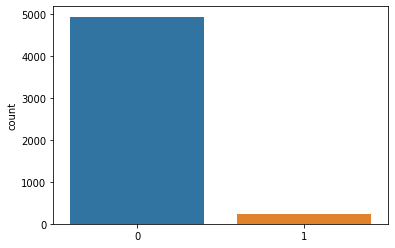

In [72]:
sns.countplot(prediction)

In [73]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [74]:
sub_file = ss.copy()

In [75]:
sub_file.target = prediction

In [76]:
sub_file.to_csv('base_model_pred_file.csv',index=False)

# Improving on model performance tips

- Deep EDA and domain knowledge sourcing
- Re-group Categorical features 
- Feature Engineering 
- Dataset balancing
- Hyperparameter tunning with gridsearch
- Ensembling of models 
- Cross-validation to avoid over fitting and under-fitting

# ******************* GOOD LUCK!!! ***************************